$Hey$ $There$

Sell Signals = -1 |||||
Buy Signals = 1 |||||
Nothing Happened = 0


In [1]:
import talib

In [289]:
from data_provider import *
dm = DataModel(data_location="../excels")
dm.restore_from_pystore()
df = dm.get(dm.TA_SYMBOLS[0], "1390-01-01", "1398-01-01")

In [8]:
dff = df.iloc[0:1000]
dff.head()

,name,amount,volume,value,lastday,open,close,last-change,last-percent,ending,...,adj_high,adj_close,adj_open,adj_ending,log_adj_open,log_adj_close,log_adj_ending,log_adj_low,log_adj_high,adj_scale
date,,,,,,,,,,,,,,,,,,,,,
2016-03-26,پارس‌ خودرو,2270.0,31438076.0,6.761155e+10,2247.0,2233.0,2135.0,-112.0,-4.98,2151.0,...,1555.028916,1486.783133,1555.028916,1497.925301,3.191738,3.172248,3.175490,3.172248,3.191738,1.0
2016-03-27,پارس‌ خودرو,2372.0,33632182.0,6.957013e+10,2151.0,2080.0,2044.0,-107.0,-4.97,2069.0,...,1493.746988,1423.412048,1448.481928,1440.821687,3.160913,3.153331,3.158610,3.153331,3.174277,1.0
2016-03-28,پارس‌ خودرو,1092.0,18855642.0,3.715751e+10,2069.0,1966.0,1966.0,-103.0,-4.98,1971.0,...,1413.662651,1369.093976,1369.093976,1372.575904,3.136433,3.136433,3.137536,3.136433,3.150346,1.0
2016-03-29,پارس‌ خودرو,6993.0,111269741.0,2.193605e+11,1971.0,1873.0,2069.0,98.0,4.97,1971.0,...,1440.821687,1440.821687,1304.330120,1372.575904,3.115388,3.158610,3.137536,3.115388,3.158610,1.0
2016-03-30,پارس‌ خودرو,540.0,8702329.0,1.800065e+10,1971.0,2069.0,2069.0,98.0,4.97,2068.0,...,1440.821687,1440.821687,1440.821687,1440.125301,3.158610,3.158610,3.158400,3.153543,3.158610,1.0


In [9]:
# Main Function 
# We Call this from outside of the module

def technical_signals(df):
    signal_df = pd.DataFrame()
    
    signal_df = pd.concat([signal_df, indicators_signal(df)], axis=1)
    signal_df = pd.concat([signal_df, patterns_signal(df)], axis=1)
    signal_df = pd.concat([signal_df, candle_patterns_signal(df)], axis=1)
    
    return signal_series


    

In [318]:
def candle_patterns_signal(df):
    
    final_result = []
    
    function_names = ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS',
    'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK',
    'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR', 'CDLDRAGONFLYDOJI', 'CDLENGULFING', 'CDLEVENINGDOJISTAR', 'CDLEVENINGSTAR', 'CDLGAPSIDESIDEWHITE',
    'CDLGRAVESTONEDOJI', 'CDLHAMMER', 'CDLHANGINGMAN', 'CDLHARAMI', 'CDLHARAMICROSS', 'CDLHIGHWAVE', 'CDLHIKKAKE', 'CDLHIKKAKEMOD', 'CDLHOMINGPIGEON',
    'CDLIDENTICAL3CROWS', 'CDLINNECK', 'CDLINVERTEDHAMMER', 'CDLKICKING', 'CDLKICKINGBYLENGTH', 'CDLLADDERBOTTOM', 'CDLLONGLEGGEDDOJI', 'CDLLONGLINE',
    'CDLMARUBOZU', 'CDLMATCHINGLOW', 'CDLMATHOLD', 'CDLMORNINGDOJISTAR', 'CDLMORNINGSTAR', 'CDLONNECK', 'CDLPIERCING', 'CDLRICKSHAWMAN', 'CDLRISEFALL3METHODS', 
    'CDLSEPARATINGLINES', 'CDLSHOOTINGSTAR', 'CDLSHORTLINE', 'CDLSPINNINGTOP', 'CDLSTALLEDPATTERN','CDLSTICKSANDWICH', 'CDLTAKURI', 'CDLTASUKIGAP', 'CDLTHRUSTING',
    'CDLTRISTAR', 'CDLUNIQUE3RIVER', 'CDLUPSIDEGAP2CROWS', 'CDLXSIDEGAP3METHODS']

    open = np.array(df.adj_open, dtype=float)
    high = np.array(df.adj_high, dtype=float)
    low = np.array(df.adj_low, dtype=float)
    close = np.array(df.adj_close, dtype=float)

    for func_name in function_names:
        result = getattr(talib,func_name)(open, high, low, close)
        final_result.append(result/100)
    
    final_result = np.array(final_result)
    final_result = final_result.T

    return pd.DataFrame(final_result, columns=function_names)

In [319]:
candle_patterns_signal(df.iloc[0:100])

(100, 61)


,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSPINNINGTOP,CDLSTALLEDPATTERN,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
# only +1 is valid . -1 doesnt mean any thing 

def crossover(series1, series2):
    
    if type(series1) in [int, float]:
        series1 = pd.Series(series1, index=range(len(series2)))
    if type(series2) in [int, float]:
        series2 = pd.Series(series2, index=range(len(series1)))

    arr1 = np.array(series1)
    arr2 = np.array(series2)
    
    ser1 = pd.Series(np.where(arr1 > arr2 ,1.0, 0.0)).diff() # for +1 ones 
    ser1.loc[ser1[ser1 == -1].index] = 0 # deleting -1 ones . because they're wrong
    
    ser2 = pd.Series(np.where(arr2 > arr1 ,1.0, 0.0)).diff() # for -1 ones
    ser1.loc[ser2[ser2 == 1].index] = -1 # replacing -1 ones in main series
    ser1.iloc[0] = 0
    return(ser1)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5   -1.0
6    0.0
7    1.0
8   -1.0
9    1.0
dtype: float64

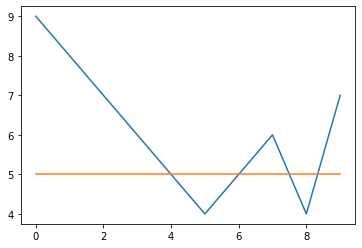

In [180]:
y1 = pd.Series([9,8,7,6,5,4,5,6,4,7])
y2 = pd.Series([5,5,5,5,5,5,5,5,5,5])
import matplotlib.pyplot as plt
plt.plot(np.arange(len(y1)), y1)
plt.plot(np.arange(len(y1)), y2)
crossover(y1,y2)

In [13]:
def MACD(df):
    
    
    



SyntaxError: unexpected EOF while parsing (<ipython-input-13-f1f413bc2982>, line 5)

In [14]:
def sma_signal():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-14-bb3ffb9bfee0>, line 1)

HereWeGo

In [286]:
def RSI(df):
    final_ser = pd.Series(0,index=df.index)
    rsi = talib.RSI(df.adj_close.values)
    top_crosses = crossover(rsi, 70)
    top_crosses.index = df.index
    final_ser.loc[top_crosses[top_crosses == 1].index] = -1
    
    buttom_crosses = crossover(30, rsi)
    buttom_crosses.index = df.index
    final_ser.loc[buttom_crosses[buttom_crosses == 1].index] = 1
    
    
#     final_ser = crossover(rsi, 70)
#     final_ser.loc[final_ser[final_ser == -1].index] = 0
    return final_ser

In [247]:
def STOCH(df):
    
    k, d = talib.STOCH(high=df.adj_high, low=df.adj_low, close=df.adj_close)
    k.loc[k[k.isnull()].index] = 0
    d.loc[d[d.isnull()].index] = 0
    
    crosses = crossover(k, d)    
    crosses.index = k.index
    buy_signals_index = k[np.logical_and(k>80, crosses == 1)].index

    sell_signals_index = k[np.logical_and(k>80, crosses==-1)].index
    final_ser = pd.Series(0 ,index=k.index)
    final_ser.loc[buy_signals_index] = 1
    final_ser.loc[sell_signals_index] = -1
    
    return final_ser


In [320]:
def indicators_signal(df):
#     indicators = ["MACD", "RSI", "STOCH", "BBANDS", "SMA"]
    indicators = ["STOCH", "RSI"]
    final_result = pd.DataFrame()
    for func_name in indicators:
        result = globals()[func_name](df)
        final_result[func_name]= result
        
    return final_result
    

In [19]:
def patterns_signal(): 
    

SyntaxError: unexpected EOF while parsing (<ipython-input-19-6bb91dc048a1>, line 2)